In [4]:
import pickle
import numpy as np

pncdir = '/home/anton/Documents/Tulane/Research/ImageNomer/data/anton/cohorts/PNC'

pncdemo = pickle.load(open(f'{pncdir}/demographics.pkl', 'rb'))

rest = []
nback = []
emoid = []

for sub in pncdemo['age_at_cnb']:
    try:
        pr = np.load(f'{pncdir}/fc/{sub}_task-rest_fc.npy')
        pn = np.load(f'{pncdir}/fc/{sub}_task-nback_fc.npy')
        pe = np.load(f'{pncdir}/fc/{sub}_task-emoid_fc.npy')
        rest.append(pr)
        nback.append(pn)
        emoid.append(pe)
    except:
        pass

rest = np.stack(rest)
nback = np.stack(nback)
emoid = np.stack(emoid)

print([a.shape for a in [rest, nback, emoid]])

[(1345, 34716), (1345, 34716), (1345, 34716)]


In [5]:
ours2orig = [12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27,
28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 254, 41, 42, 43, 44, 45,
46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64,
65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 85,
86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103,
104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118,
119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 136, 138, 132,
133, 134, 135, 220, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152,
153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 185, 186,
187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201,
202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216,
217, 218, 219, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232,
233, 137, 234, 235, 236, 237, 238, 239, 240, 241, 250, 251, 255, 256, 257,
258, 259, 260, 261, 262, 263, 242, 243, 244, 245, 0, 1, 2, 3, 4, 5, 6, 7, 8,
9, 10, 11, 83, 84, 131, 139, 140, 141, 181, 182, 183, 184, 246, 247, 248,
249, 252, 253]

def vec2mat(v):
    a,b = np.triu_indices(264,1)
    m = np.zeros((264,264))
    m[a,b] = v
    return m+m.T

def remap(fc, roimap=ours2orig):
    fc = fc[roimap,:]
    fc = fc[:,roimap]
    return fc

print('Complete')

Complete


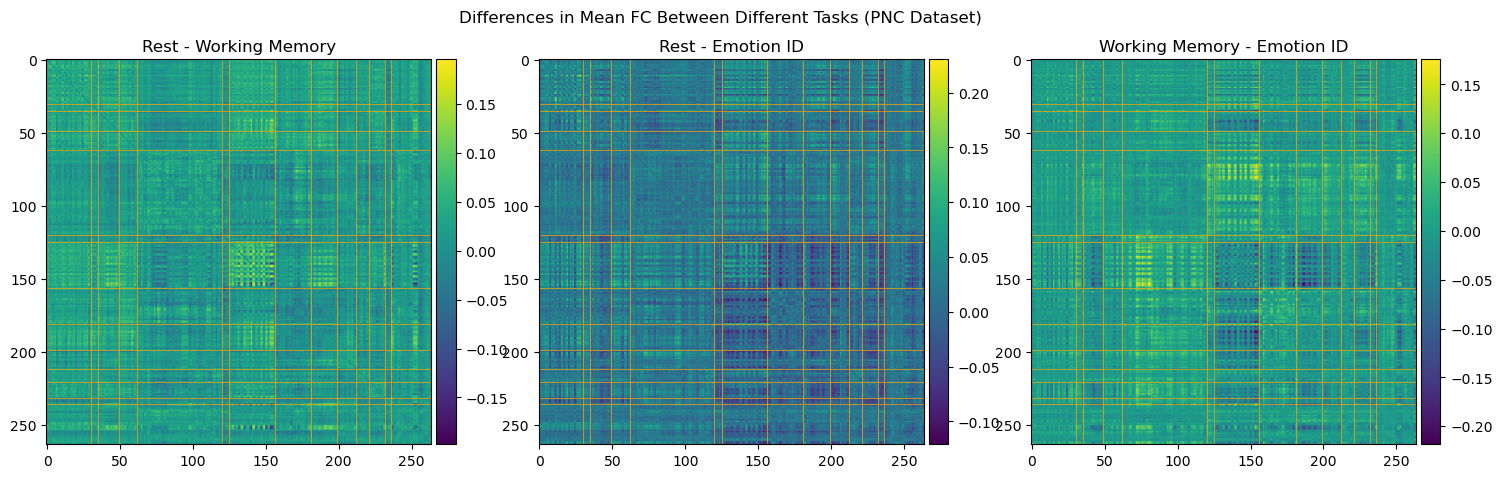

In [16]:
def diffimg(a, b):
    return remap(vec2mat(np.mean(a, axis=0) - np.mean(b, axis=0)))

bounds = [0, 30, 35, 49, 62, 120, 125, 156, 181, 199, 212, 221, 232, 236, 264]

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots(1,3,figsize=(18,5))

divider = make_axes_locatable(ax[0])
cax = divider.append_axes('right', size='5%', pad=0.05)

im = ax[0].imshow(diffimg(rest, nback))

fig.colorbar(im, cax=cax, orientation='vertical')

divider = make_axes_locatable(ax[1])
cax = divider.append_axes('right', size='5%', pad=0.05)

im = ax[1].imshow(diffimg(rest, emoid))

fig.colorbar(im, cax=cax, orientation='vertical')

divider = make_axes_locatable(ax[2])
cax = divider.append_axes('right', size='5%', pad=0.05)

im = ax[2].imshow(diffimg(nback, emoid))

ax[0].set_title('Rest - Working Memory')
ax[1].set_title('Rest - Emotion ID')
ax[2].set_title('Working Memory - Emotion ID')

for axx in ax:
    for a in bounds[1:-1]:
        axx.plot([a,a],[0,263], color='orange', linewidth=0.5)
        axx.plot([0,263],[a,a], color='orange', linewidth=0.5)

fig.colorbar(im, cax=cax, orientation='vertical')

fig.suptitle('Differences in Mean FC Between Different Tasks (PNC Dataset)')
fig.savefig('/home/anton/Documents/Tulane/Research/Work/UKB/long_fig10_pnc.pdf')
fig.show()